# **```Predicting Ultimate Tensile Strength (UTS) on austenitic stainless steel ```**

## 1. Problem Statement:
- Predicting mechanical properties of metals from big data is of great importance to materials engineering. 
- The present work aims at applying supervised machine learning model to predict the tensile properties such as ultimate tensile strength (UTS) on austenitic stainless steel as a function of chemical composition, heat treatment and test temperature.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [76]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\cp2\End_to_End_UTS_Steel_Strength_Prediction-master\data\Data.csv",index_col="Unnamed: 0")

In [77]:
data.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,W,Cu,N,C,B,P,S,Co,Al,Sn,Pb,Solution_treatment_temperature,Solution_treatment_time(s),Water_Quenched_after_s.t.,Air_Quenched_after_s.t.,Grains mm-2,Type of melting,Size of ingot,Product form,Temperature (K),0.2%proof_stress (M Pa),UTS (M Pa),Elongation (%),Area_reduction (%),Comments
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,Yes,No,477.7128917,BEA,3,Tube,298,280.0,610.0,67,83,NRIM/CDS/No4B/1986 ABA
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,Yes,No,477.7128917,BEA,3,Tube,373,243.0,508.0,54,83,NRIM/CDS/No4B/1986 ABA
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,Yes,No,477.7128917,BEA,3,Tube,473,220.0,472.0,44,81,NRIM/CDS/No4B/1986 ABA
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,Yes,No,477.7128917,BEA,3,Tube,573,204.0,470.0,43,76,NRIM/CDS/No4B/1986 ABA
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,Yes,No,477.7128917,BEA,3,Tube,673,197.0,470.0,45,76,NRIM/CDS/No4B/1986 ABA


## 2. Dataset Description:

### 2.1. Features: 

Column 1         Chromium wt%

Column 2         Nickel wt%

Column 3         Molybdenum wt%

Column 4         Manganese wt%

Column 5         Silicon wt%

Column 6         Niobium wt%

Column 7         Titanium wt%

Column 8         Zirconium wt%

Column 9         Tantalum wt%

Column 10       Vanadium wt%

Column 11       Tungsten wt%

Column 12       Copper wt%

Column 13       Nitrogen wt%

Column 14       Carbon wt%

Column 15       Boron wt%

Column 16       Phosphorus wt%

Column 17       Sulphur wt%

Column 18       Cobalt wt%

Column 19       Aluminium wt%

Column 20       Tin wt%

Column 21       Lead wt%

Column 22       Solution treatment temperature / K

Column 23       Solution treatment time /s

Column 24       Water quenched after solution treatment

Column 25       Air quenched after solution treatment

Column 26       Grains mm-2

Column 27       Type of melting

Column 28       Size of ingot

Column 29       Product form

Column 30       Temperature / K

Column 31       0.2% proof stress / MPa

Column 32       UTS / MPa

Column 33       Elongation (%)

Column 34       Area_reduction (%)

Column 35       Comments

### 2.2. Information Given:

- Dataset contains the chemical composition of the `2180` steels studied, and their mechanical properties at different heat treatment and test temperatures.
- The presence of an `na` indicates that the value was not reported in the dataset.

In [78]:
df=data.copy()

- Removing Unwanted columns which cannot be used for model building

In [79]:
df.drop(columns=["0.2%proof_stress (M Pa)","Elongation (%)","Area_reduction (%)","Comments"],inplace=True)

- As presence of an na indicates that the value was not reported in the dataset, so first we need to convert it into null values

In [80]:
df=df.replace("Na", np.NaN)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 2179
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cr                              2180 non-null   float64
 1   Ni                              2180 non-null   float64
 2   Mo                              2180 non-null   float64
 3   Mn                              2180 non-null   float64
 4   Si                              2180 non-null   float64
 5   Nb                              2180 non-null   float64
 6   Ti                              2180 non-null   float64
 7   Zr                              2180 non-null   int64  
 8   Ta                              2180 non-null   int64  
 9   V                               2180 non-null   float64
 10  W                               2179 non-null   float64
 11  Cu                              2180 non-null   float64
 12  N                               21

- Converting Datatypes of columns `Solution_treatment_temperature` , `Solution_treatment_time(s)`,`Grains mm-2` ,`Size of ingot`  to float which is by default object

In [82]:
df["Solution_treatment_temperature"]=df["Solution_treatment_temperature"].astype(float)
df["Solution_treatment_time(s)"]=df["Solution_treatment_time(s)"].astype(float)
df["Grains mm-2"]=df["Grains mm-2"].astype(float)
df["Size of ingot"]=df["Size of ingot"].astype(float)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 2179
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cr                              2180 non-null   float64
 1   Ni                              2180 non-null   float64
 2   Mo                              2180 non-null   float64
 3   Mn                              2180 non-null   float64
 4   Si                              2180 non-null   float64
 5   Nb                              2180 non-null   float64
 6   Ti                              2180 non-null   float64
 7   Zr                              2180 non-null   int64  
 8   Ta                              2180 non-null   int64  
 9   V                               2180 non-null   float64
 10  W                               2179 non-null   float64
 11  Cu                              2180 non-null   float64
 12  N                               21

## 3. Data Cleaning

In [84]:
df.size

67580

In [85]:
df.shape

(2180, 31)

In [86]:
df.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,W,Cu,N,C,B,P,S,Co,Al,Sn,Pb,Solution_treatment_temperature,Solution_treatment_time(s),Water_Quenched_after_s.t.,Air_Quenched_after_s.t.,Grains mm-2,Type of melting,Size of ingot,Product form,Temperature (K),UTS (M Pa)
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403.0,NaN,Yes,No,477.712892,BEA,3.0,Tube,298,610.0
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403.0,NaN,Yes,No,477.712892,BEA,3.0,Tube,373,508.0
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403.0,NaN,Yes,No,477.712892,BEA,3.0,Tube,473,472.0
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403.0,NaN,Yes,No,477.712892,BEA,3.0,Tube,573,470.0
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403.0,NaN,Yes,No,477.712892,BEA,3.0,Tube,673,470.0


### 3.1. Deal with missing data columns

In [87]:
df.isnull().sum()[df.isnull().sum()>0]

W                                    1
Solution_treatment_temperature     184
Solution_treatment_time(s)        1097
Water_Quenched_after_s.t.          264
Air_Quenched_after_s.t.            264
Grains mm-2                       1517
Type of melting                    217
Size of ingot                     1517
dtype: int64

In [88]:
(df.isnull().sum()*100/df.shape[0])[df.isnull().sum()*100/df.shape[0]>0]

W                                  0.045872
Solution_treatment_temperature     8.440367
Solution_treatment_time(s)        50.321101
Water_Quenched_after_s.t.         12.110092
Air_Quenched_after_s.t.           12.110092
Grains mm-2                       69.587156
Type of melting                    9.954128
Size of ingot                     69.587156
dtype: float64

- Columns such as `Grains mm-2`, `Size of ingot` contains large missing values. So these columns needs to be dropped.

In [89]:
df.drop(columns=["Grains mm-2","Size of ingot"],inplace=True)

- Columns such as `Product Form`, `Type of Melting` does not play any role for ultimate tensile strength. So these Columns also needs to be dropped

In [90]:
df.drop(columns=["Product form","Type of melting"],inplace=True)

In [91]:
df.describe()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,W,Cu,N,C,B,P,S,Co,Al,Sn,Pb,Solution_treatment_temperature,Solution_treatment_time(s),Temperature (K),UTS (M Pa)
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.0,2180.0,2180.000000,2179.0,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.0,2180.0,1996.000000,1083.000000,2180.000000,2180.000000
mean,17.808335,12.580528,1.015940,1.463771,0.499528,0.095143,0.145684,0.0,0.0,0.002547,0.0,0.042482,0.006798,0.056881,0.000378,0.021331,0.012847,0.035182,0.031617,0.0,0.0,1360.897295,1754.349030,674.651376,433.330996
std,0.991134,5.152322,1.164922,0.235216,0.140637,0.256143,0.202533,0.0,0.0,0.009969,0.0,0.081307,0.011949,0.014257,0.001039,0.007546,0.007328,0.099834,0.102131,0.0,0.0,35.584331,1904.618721,233.025431,93.726234
min,15.900000,8.400000,0.000000,0.610000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.012000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1279.000000,0.000000,293.000000,47.000000
25%,17.110000,10.430000,0.000000,1.430000,0.400000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.050000,0.000000,0.019000,0.007000,0.000000,0.000000,0.0,0.0,1333.000000,120.000000,473.000000,393.811666
50%,17.700000,11.600000,0.110000,1.520000,0.490000,0.000000,0.014000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.055000,0.000000,0.023000,0.012000,0.000000,0.000000,0.0,0.0,1348.000000,1500.000000,673.000000,439.000000
75%,18.200000,12.210000,2.370000,1.610000,0.590000,0.010000,0.390000,0.0,0.0,0.000000,0.0,0.060000,0.012000,0.065000,0.000300,0.025000,0.018000,0.000000,0.010000,0.0,0.0,1373.000000,2160.000000,873.000000,484.000000
max,21.060000,34.450000,2.910000,1.820000,1.150000,0.950000,0.560000,0.0,0.0,0.057000,0.0,0.350000,0.081000,0.120000,0.015000,0.040000,0.050000,0.540000,0.520000,0.0,0.0,1473.000000,7200.000000,1273.000000,713.924120


- Columns such as `Zr`, `TA`,`W`,`Sn`,`Pb` contains all values as `0`. So these Columns also needs to be dropped


In [92]:
df.drop(columns=["Zr","Ta","W","Sn","Pb"],inplace=True)

In [93]:
(df.isnull().sum()*100/df.shape[0])[df.isnull().sum()*100/df.shape[0]>0]

Solution_treatment_temperature     8.440367
Solution_treatment_time(s)        50.321101
Water_Quenched_after_s.t.         12.110092
Air_Quenched_after_s.t.           12.110092
dtype: float64

- `Solution_treatment_time(s)`,`Water_Quenched_after_s.t.`,`Air_Quenched_after_s.t.` plays an `Important Role` as Properties of steel mainly depands on it. So records having `Null` value in `Solution_treatment_time(s)`,`Water_Quenched_after_s.t.`,`Air_Quenched_after_s.t.` cannot be used.

In [94]:
df.dropna(axis=0, subset=['Solution_treatment_time(s)'],inplace=True)

In [95]:
df.dropna(axis=0, subset=['Water_Quenched_after_s.t.'],inplace=True)

In [96]:
(df.isnull().sum()*100/df.shape[0])[df.isnull().sum()*100/df.shape[0]>0]

Series([], dtype: float64)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 66 to 2167
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cr                              1037 non-null   float64
 1   Ni                              1037 non-null   float64
 2   Mo                              1037 non-null   float64
 3   Mn                              1037 non-null   float64
 4   Si                              1037 non-null   float64
 5   Nb                              1037 non-null   float64
 6   Ti                              1037 non-null   float64
 7   V                               1037 non-null   float64
 8   Cu                              1037 non-null   float64
 9   N                               1037 non-null   float64
 10  C                               1037 non-null   float64
 11  B                               1037 non-null   float64
 12  P                               1

In [98]:
df["Water_Quenched_after_s.t."].replace({"No":0,"Yes":1},inplace=True)
df["Air_Quenched_after_s.t."].replace({"No":0,"Yes":1},inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 66 to 2167
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cr                              1037 non-null   float64
 1   Ni                              1037 non-null   float64
 2   Mo                              1037 non-null   float64
 3   Mn                              1037 non-null   float64
 4   Si                              1037 non-null   float64
 5   Nb                              1037 non-null   float64
 6   Ti                              1037 non-null   float64
 7   V                               1037 non-null   float64
 8   Cu                              1037 non-null   float64
 9   N                               1037 non-null   float64
 10  C                               1037 non-null   float64
 11  B                               1037 non-null   float64
 12  P                               1

- After data cleaning, no nulls are remained. So Exploratory Data analysis can be done

In [100]:
df.head(1)

,Cr,Ni,Mo,Mn,Si,Nb,Ti,V,Cu,N,C,B,P,S,Co,Al,Solution_treatment_temperature,Solution_treatment_time(s),Water_Quenched_after_s.t.,Air_Quenched_after_s.t.,Temperature (K),UTS (M Pa)
66,18.16,9.8,0.05,1.47,0.58,0.04,0.031,0.0,0.14,0.031,0.07,0.0003,0.022,0.013,0.0,0.015,1343.0,600.0,1,0,298,620.0


## 4. Exploratory Data Analysis

### 4.1. Univariate Data Analysis

In [101]:
df.describe()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,V,Cu,N,C,B,P,S,Co,Al,Solution_treatment_temperature,Solution_treatment_time(s),Water_Quenched_after_s.t.,Air_Quenched_after_s.t.,Temperature (K),UTS (M Pa)
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,17.901726,13.293983,0.705361,1.424079,0.538312,0.078581,0.244722,0.002847,0.055757,0.007875,0.057709,0.000237,0.020842,0.013508,0.046093,0.049653,1364.412729,1793.404050,0.405014,0.594986,678.617165,425.857592
std,1.024191,6.324274,1.060158,0.280454,0.143843,0.226181,0.217176,0.011074,0.097583,0.013193,0.015451,0.000556,0.007880,0.007595,0.115806,0.133636,39.349996,1929.461606,0.491132,0.491132,242.793637,102.058608
min,15.900000,8.400000,0.000000,0.690000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012000,0.000000,0.000000,0.000000,0.000000,0.000000,1293.000000,0.000000,0.000000,0.000000,293.000000,47.000000
25%,17.270000,10.440000,0.000000,1.360000,0.440000,0.000000,0.011000,0.000000,0.000000,0.000000,0.050000,0.000000,0.019000,0.009000,0.000000,0.000000,1323.000000,180.000000,0.000000,0.000000,473.000000,387.362675
50%,17.710000,11.700000,0.040000,1.520000,0.520000,0.000000,0.290000,0.000000,0.000000,0.000000,0.055000,0.000000,0.022000,0.013000,0.000000,0.000000,1373.000000,1500.000000,0.000000,1.000000,673.000000,434.434595
75%,18.020000,12.200000,2.190000,1.620000,0.610000,0.010000,0.460000,0.000000,0.080000,0.016000,0.060000,0.000200,0.025000,0.018000,0.000000,0.013000,1393.000000,2400.000000,1.000000,1.000000,873.000000,480.000000
max,21.060000,34.450000,2.720000,1.750000,1.150000,0.900000,0.560000,0.057000,0.350000,0.081000,0.120000,0.004000,0.040000,0.050000,0.540000,0.520000,1473.000000,7200.000000,1.000000,1.000000,1273.000000,653.122890


a=[col for col in df.columns if df[col].dtypes!="object"]
for i in a:
    skew = df[i].skew()
    plt.hist(df[i], label='Skew = %.3f' %(skew), bins=30,color='green')
    plt.title("Distribution Plot of "+i)
    plt.legend(loc='best')
    plt.show();

#### A. Distribution Plot

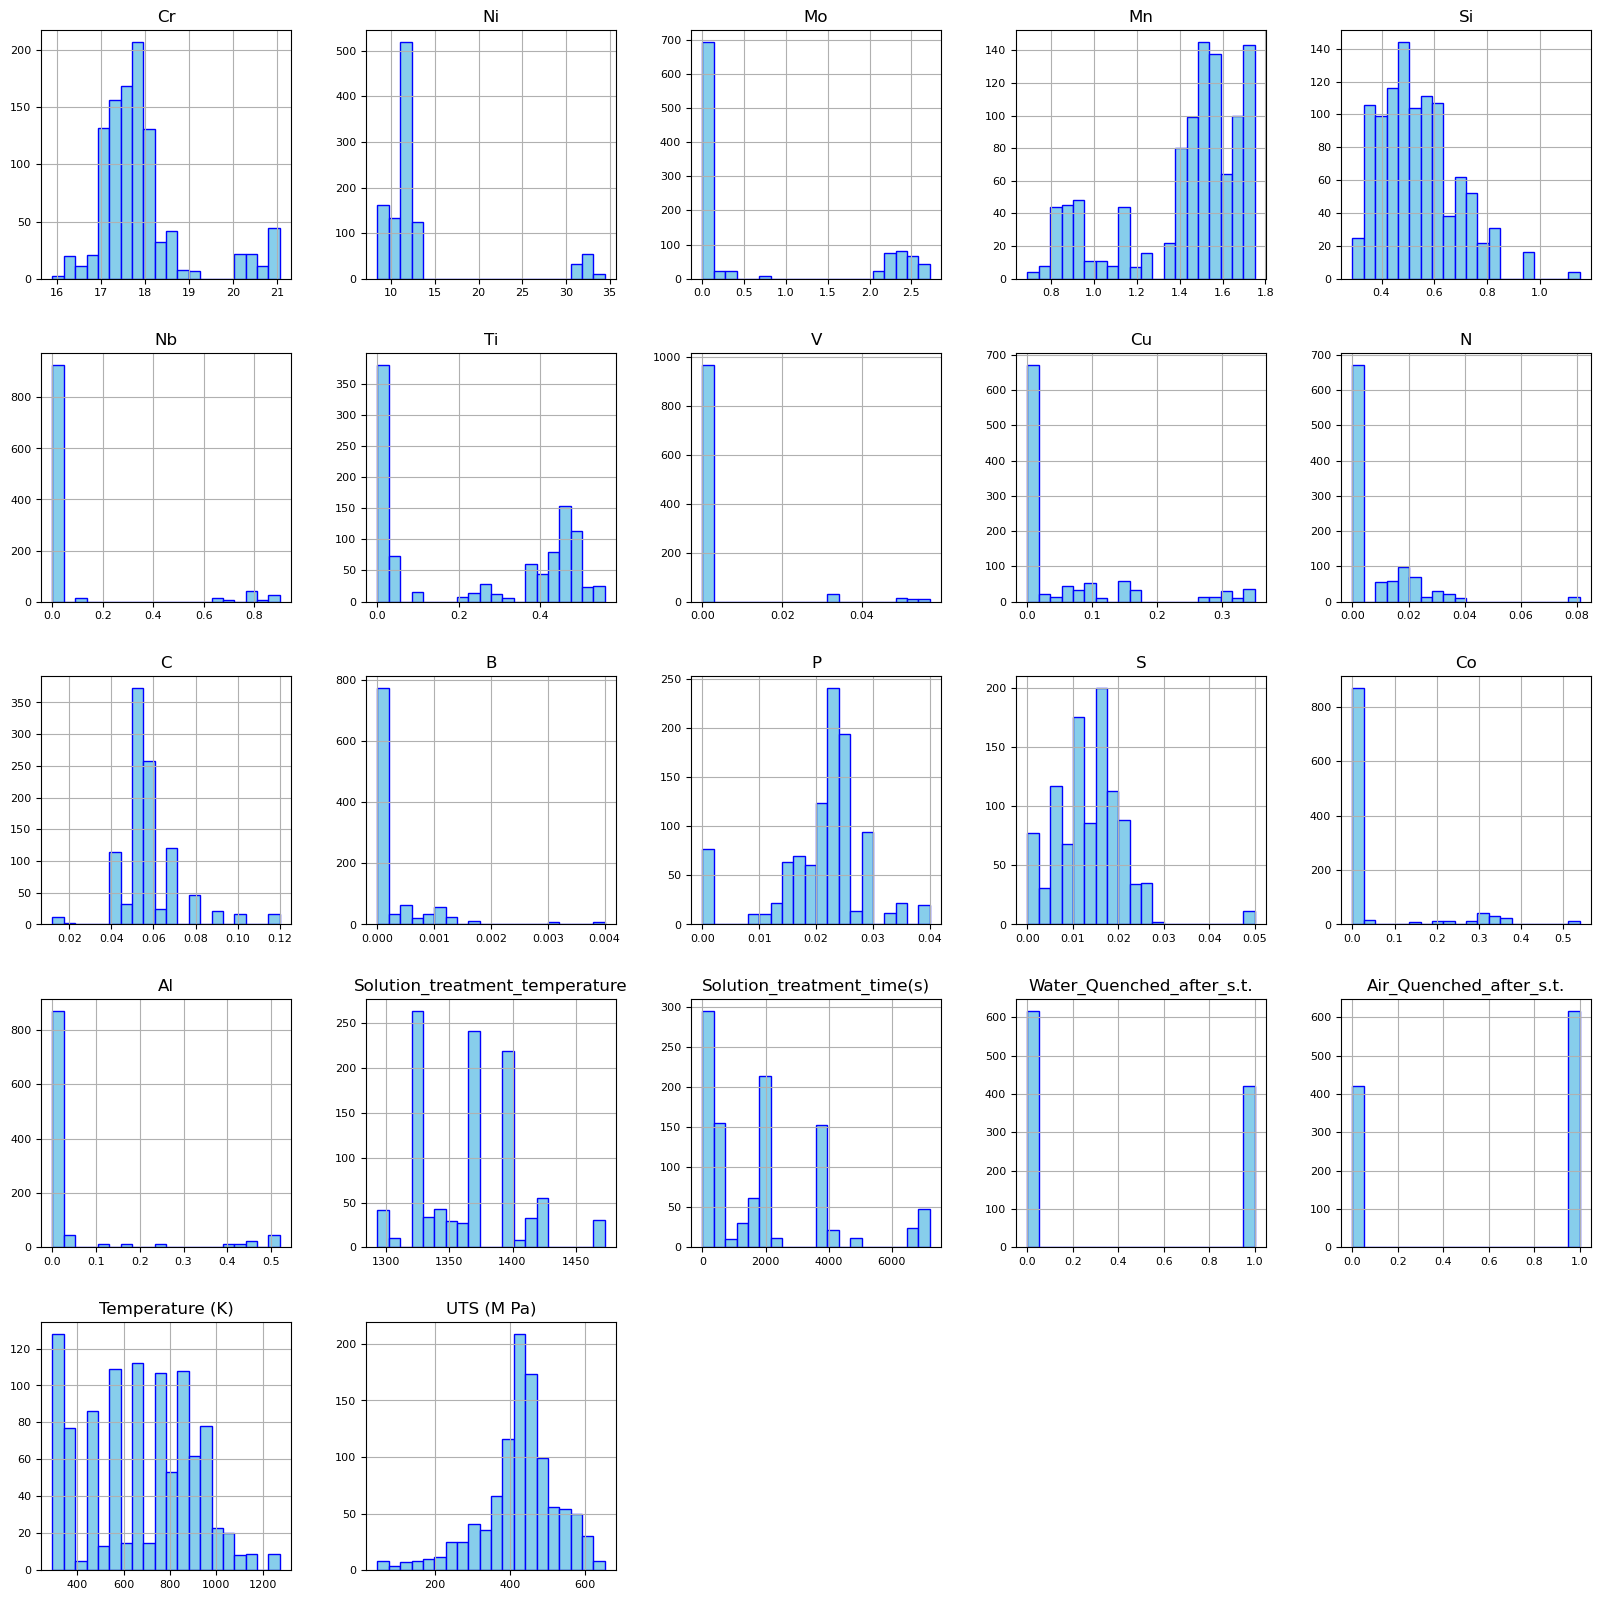

In [102]:
df.hist(bins=20,figsize=(20,20),color='skyblue',edgecolor='blue',xlabelsize=8,ylabelsize=8,);
plt.savefig('results/Distibution.png', bbox_inches='tight')

### 4.2. Bivariate Analysis

#### A. Pearson's Correlation Coefficient:
- Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. 
- The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

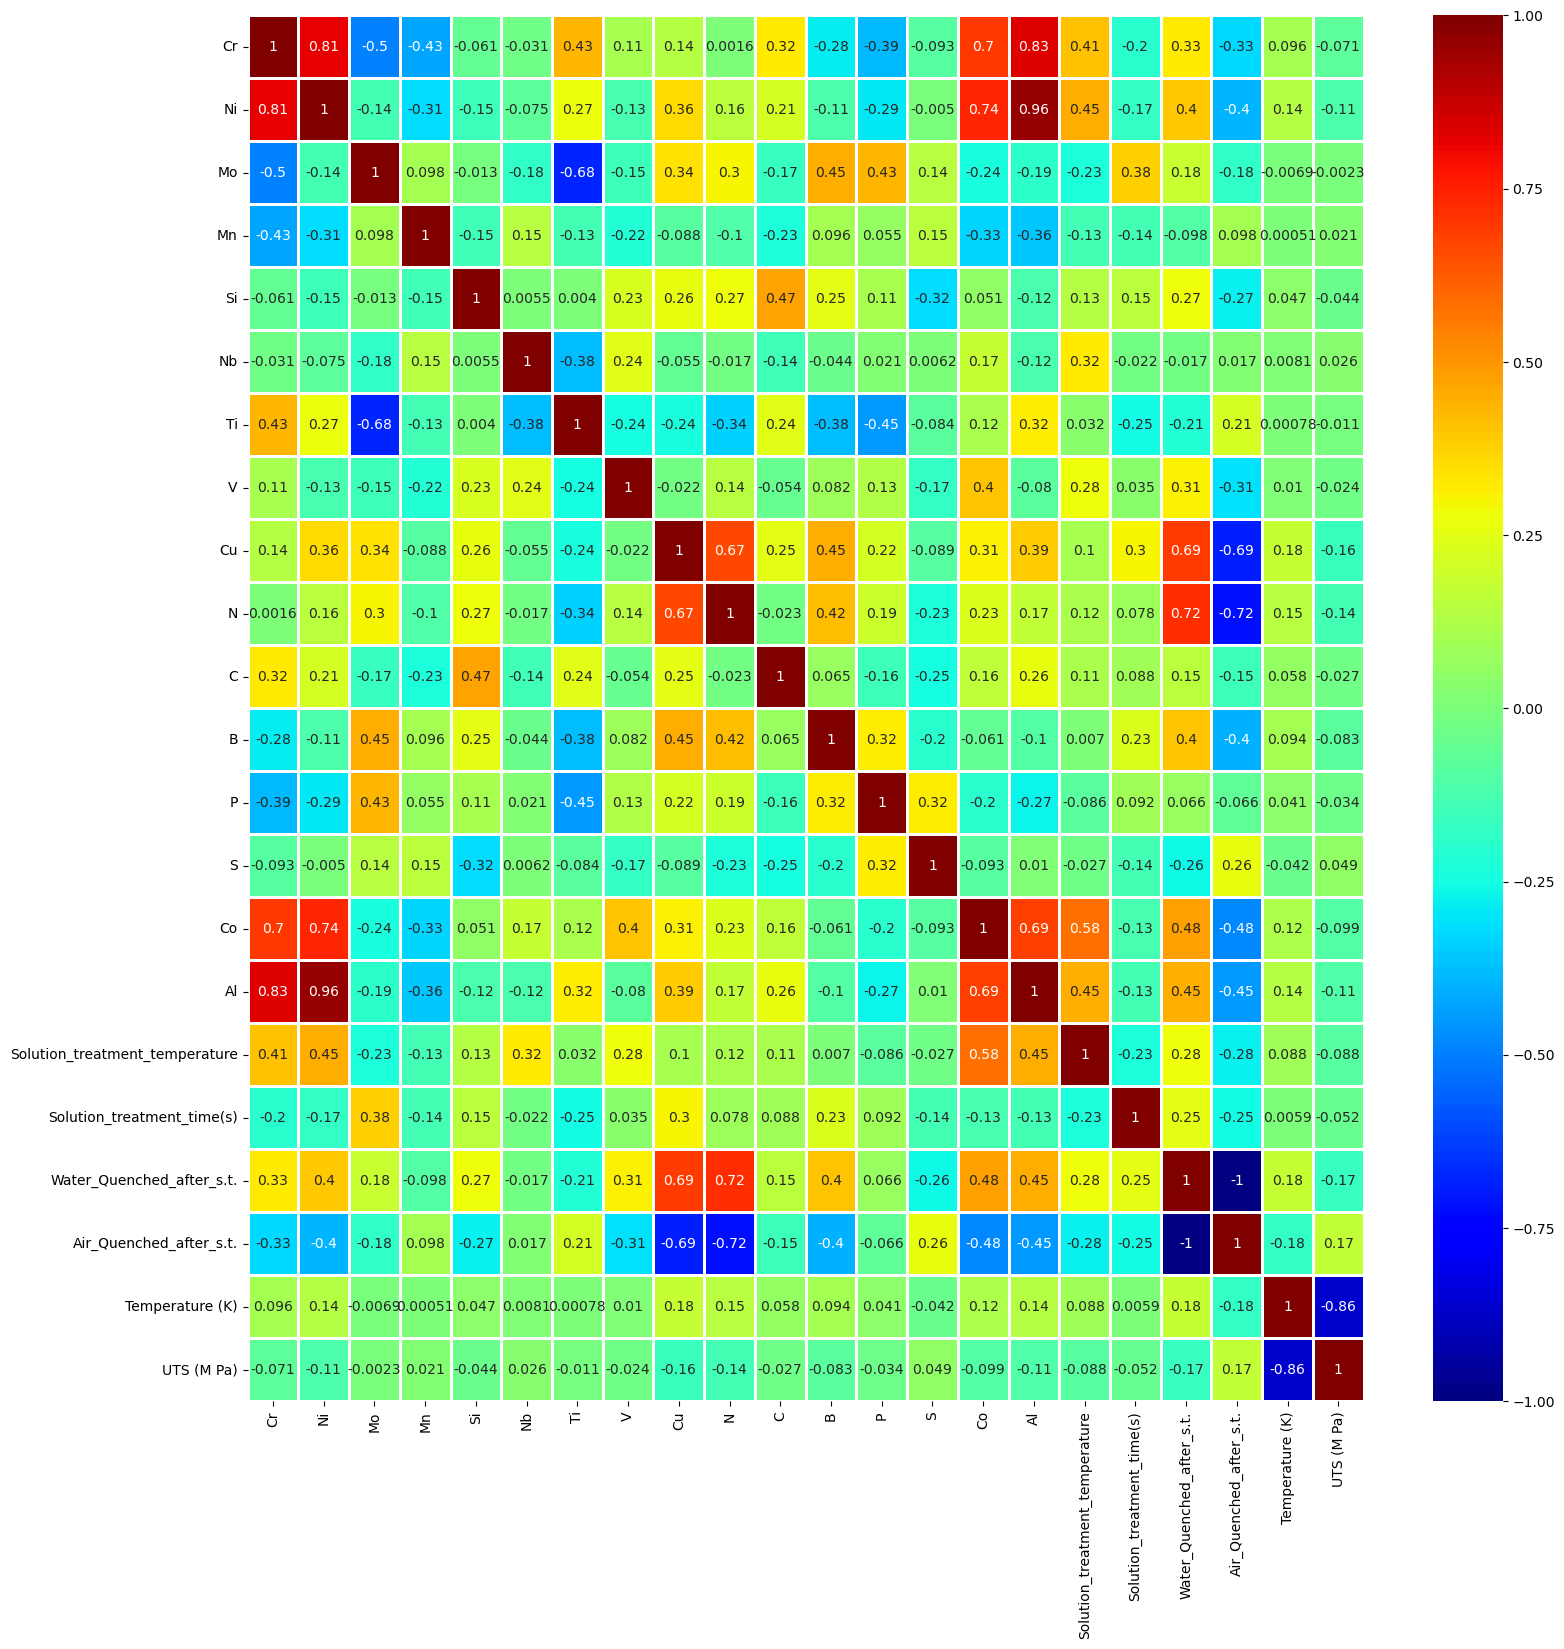

In [103]:
plt.figure(figsize=(18,18))
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white');
plt.savefig('results/correlation.png', bbox_inches='tight')

## 4.3. Feature Selection Technique

- dropping `Cr`,`Ni`,`Air_Quenched_after_s.t.` as there is high correlation greater than 0.75 or less than -0.75

In [104]:
df.drop(columns=["Cr","Ni","Air_Quenched_after_s.t."],inplace=True)

In [105]:
df.corr()["UTS (M Pa)"].sort_values(ascending=False)

UTS (M Pa)                        1.000000
S                                 0.049276
Nb                                0.025647
Mn                                0.020746
Mo                               -0.002268
Ti                               -0.010942
V                                -0.024455
C                                -0.027047
P                                -0.034012
Si                               -0.044445
Solution_treatment_time(s)       -0.051794
B                                -0.083284
Solution_treatment_temperature   -0.088376
Co                               -0.098533
Al                               -0.108020
N                                -0.140141
Cu                               -0.157979
Water_Quenched_after_s.t.        -0.166155
Temperature (K)                  -0.860521
Name: UTS (M Pa), dtype: float64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 66 to 2167
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Mo                              1037 non-null   float64
 1   Mn                              1037 non-null   float64
 2   Si                              1037 non-null   float64
 3   Nb                              1037 non-null   float64
 4   Ti                              1037 non-null   float64
 5   V                               1037 non-null   float64
 6   Cu                              1037 non-null   float64
 7   N                               1037 non-null   float64
 8   C                               1037 non-null   float64
 9   B                               1037 non-null   float64
 10  P                               1037 non-null   float64
 11  S                               1037 non-null   float64
 12  Co                              1

In [107]:
df["Water_Quenched_after_s.t."]=df["Water_Quenched_after_s.t."].astype(float)
df["Temperature (K)"]=df["Temperature (K)"].astype(float)

### 4.4. Outlier Detection

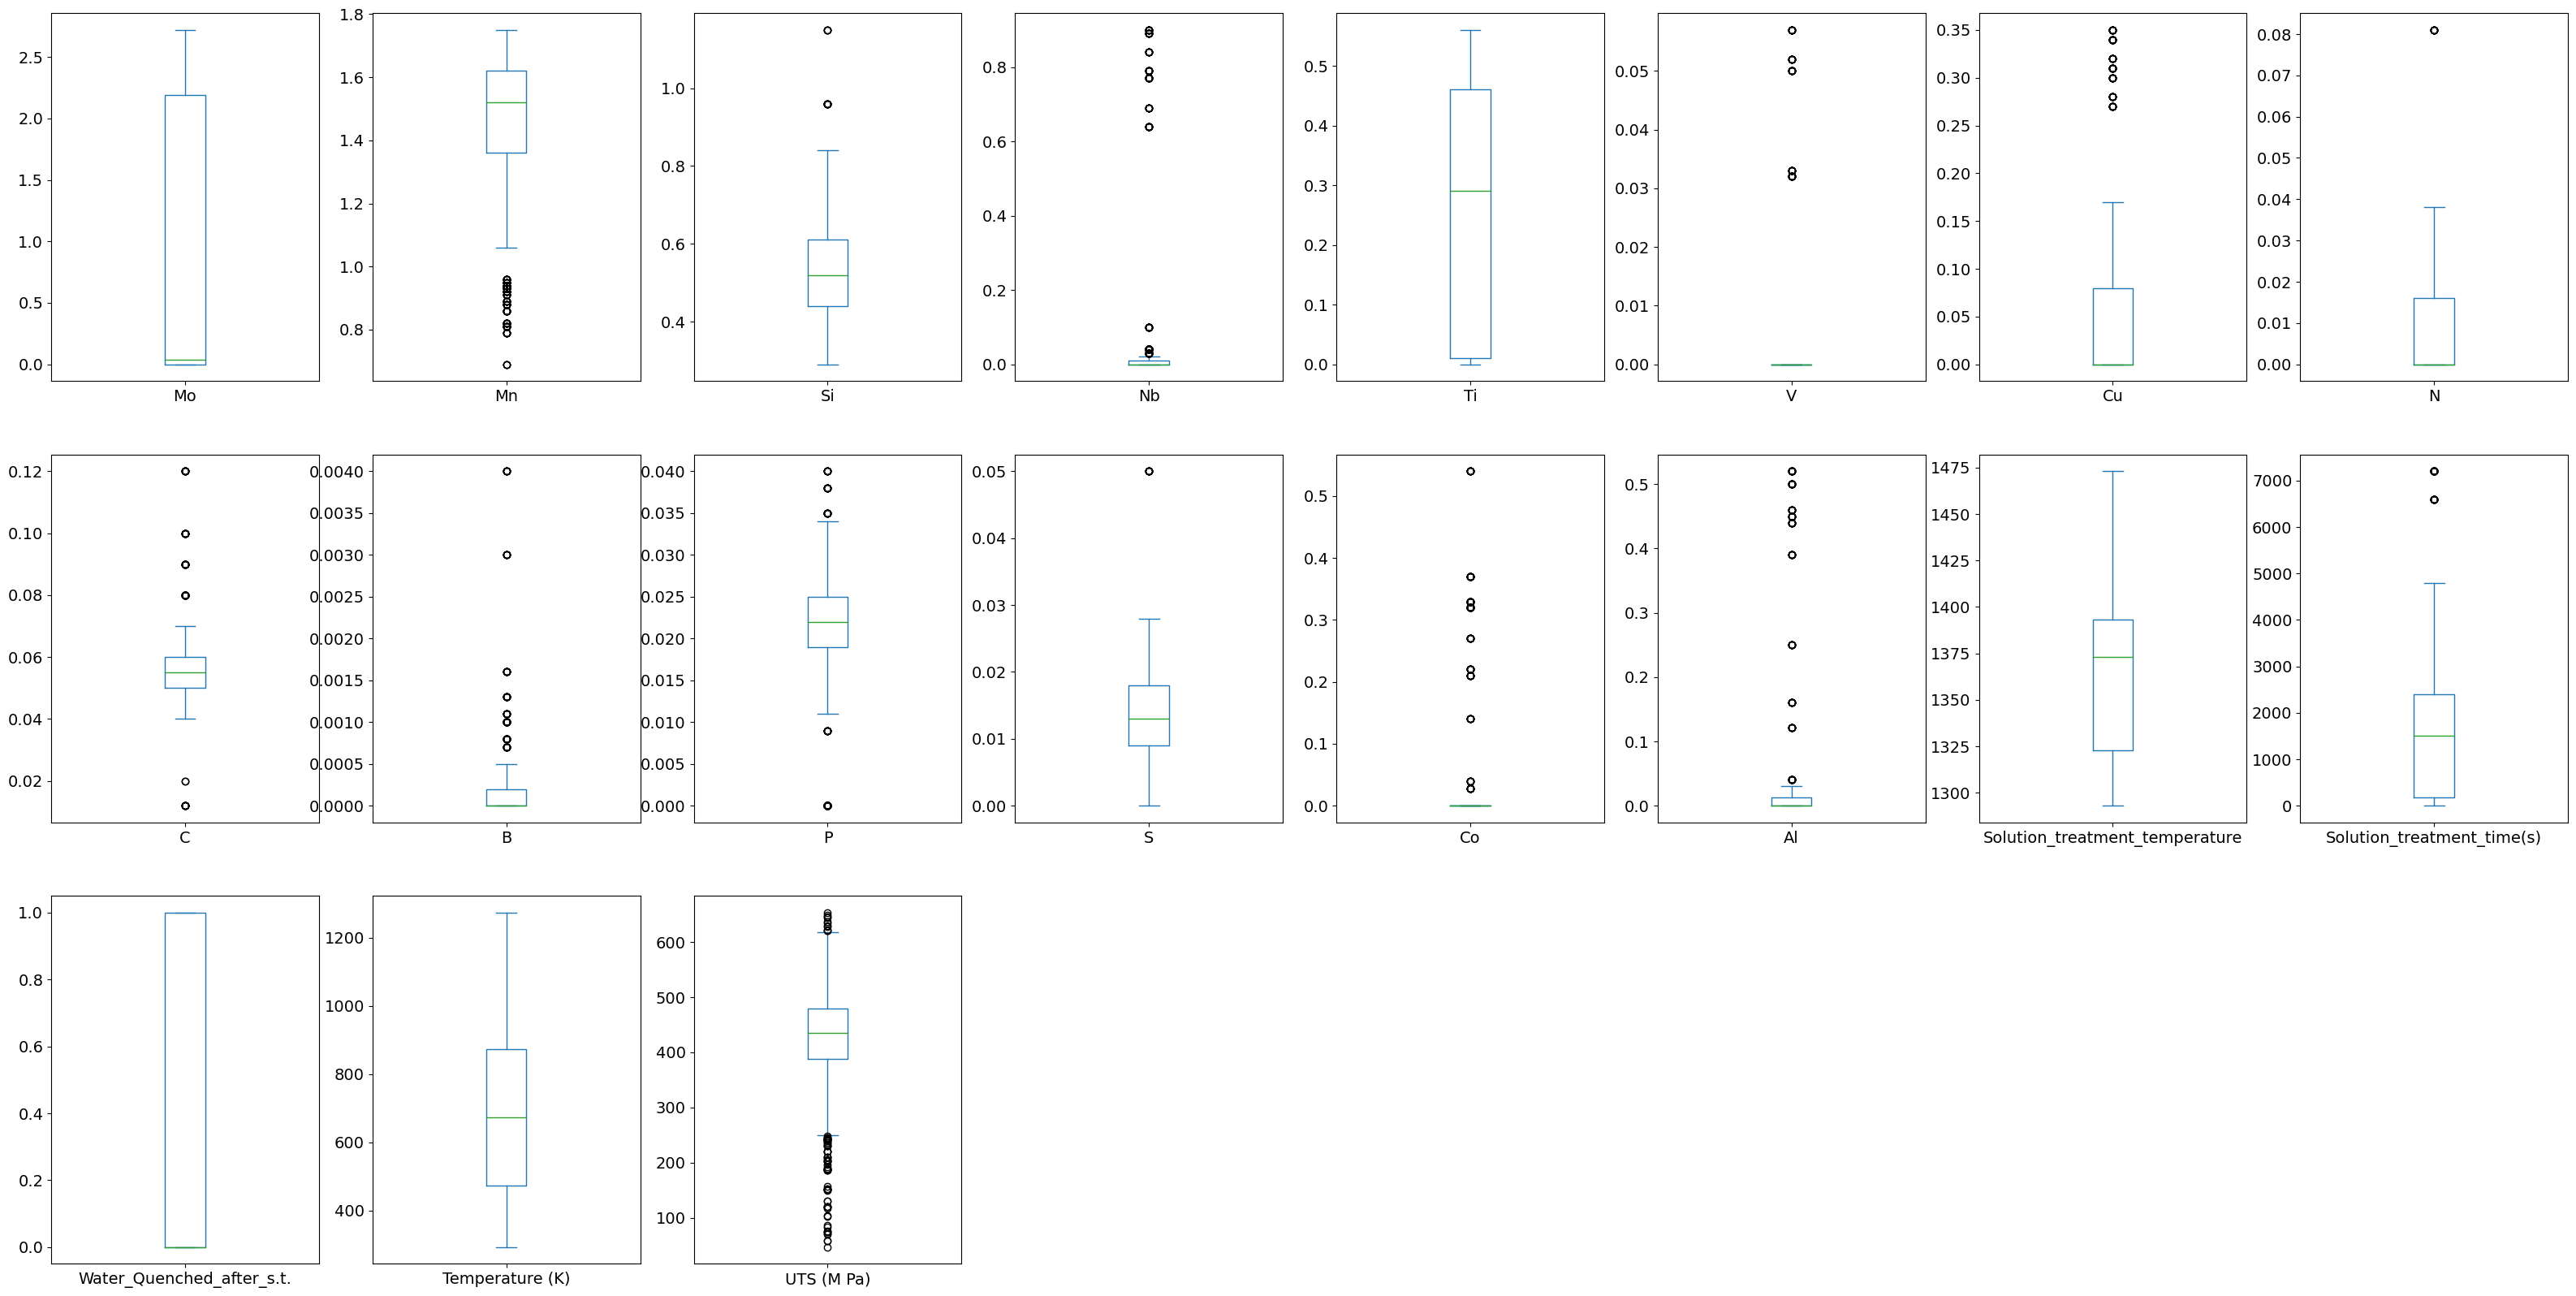

In [108]:
df.plot(kind='box',figsize=(40,20), layout=(3,8),subplots=True,fontsize="14");
plt.savefig("results/boxplot.png", bbox_inches='tight')

## 5. Machine Learning Algorithm


### 5.1. Applying Standard Scaler
- For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1 (or the variance).
- x_scaled = x – mean/std_dev
- However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [109]:
# standardization 
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(X)

In [110]:
std[1]   # even after applying Standard Scaler, there is no change in accuracy.going with data as it is

array([-0.6184707 ,  0.16381658,  0.28995365, -0.17066026, -0.98457038,
       -0.25719297,  0.86370895,  1.75367   ,  0.795903  ,  0.11268594,
        0.14703692, -0.066944  , -0.39820798, -0.25943189, -0.54442346,
       -0.61881505,  1.21204275, -1.25936014])

### 5.2. Train Test Split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(X,y,test_size=0.2,random_state=42)

### 5.3. Defing Function for all Algorithm

In [113]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn import metrics

In [114]:
result=pd.DataFrame()
train_MAE=[]
train_MSE=[]
train_RMSE=[]
train_R2=[]
test_MAE=[]
test_MSE=[]
test_RMSE=[]
test_R2=[]
CV_train_R2=[]
CV_test_R2=[]


def print_score(model, X_train, y_train, X_test, y_test, train=True,test=True):
    '''
    print the r2_score
    '''
    '''
        training performance
    '''
    print('\033[1m'+"Train Result:"+'\033[0m')
    
    print("mean absolute error: {0:.4f}".format(metrics.mean_absolute_error(y_train, model.predict(X_train))))
    train_MAE.append(metrics.mean_absolute_error(y_train, model.predict(X_train)))
    print("mean squared error: {0:.4f}".format(metrics.mean_squared_error(y_train, model.predict(X_train))))
    train_MSE.append(metrics.mean_squared_error(y_train, model.predict(X_train)))
    print("RMSE: {0:.4f}".format(np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train)))))
    train_RMSE.append(metrics.mean_squared_error(y_train, model.predict(X_train)))
    print("r2_score: {0:.4f}".format(r2_score(y_train, model.predict(X_train))))
    train_R2.append(r2_score(y_train, model.predict(X_train)))
    print("\n")
    '''
    test performance
    '''
    print('\033[1m'+"Test Result:"+'\033[0m') 
    
    print("mean absolute error: {0:.4f}".format(metrics.mean_absolute_error(y_test, model.predict(X_test))))
    test_MAE.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))
    print("mean squared error: {0:.4f}".format(metrics.mean_squared_error(y_test, model.predict(X_test))))
    test_MSE.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    print("RMSE: {0:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))))
    test_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    print("r2_score: {0:.4f}\n".format(r2_score(y_test, model.predict(X_test))))
    test_R2.append(r2_score(y_test, model.predict(X_test)))
    
    
    '''
    Cross Validation
    '''
    print('\033[1m'+"r2_Score after Cross Validation\n"+'\033[0m')
    
    folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds_train)
    print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
    CV_train_R2.append(np.mean(scores_train))
    folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores_test = cross_val_score(model, X_test, y_test, scoring='r2', cv=folds_test)
    print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))
    CV_test_R2.append(np.mean(scores_test))

### 5.4. Applying Function to all Algorithms

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [116]:
ml_model={  "Linear Regression" : LinearRegression(),
            "DecisionTree Regressor": DecisionTreeRegressor(max_depth=2),
            "RandomForest Regressor" :  RandomForestRegressor(n_estimators=100),
            "KNeighbors Regressor" : KNeighborsRegressor(),
            "Support Vector Regressor" : SVR(),
            "Bagging Regressor with DT Regressor" : BaggingRegressor(DecisionTreeRegressor(),n_estimators=500,bootstrap=True,random_state=42),
            "AdaBoostRegressor" : AdaBoostRegressor(random_state=42),
            "GradientBoosting Regressor" :GradientBoostingRegressor(random_state=40,learning_rate=0.1),
            "XGBRegressor":XGBRegressor(random_state=42,learning_rate=0.1),
            "Ridge":Ridge(),
            "Lasso":Lasso()
         }

for i in range(len(list(ml_model))):
    model = list(ml_model.values())[i]
    model_fit=model.fit(df_train_x, df_train_y)
    print("<----------------------------------------------------------------------------->")
    print('\033[1m' +str(i+1)+")"+ list(ml_model.keys())[i] + '\033[0m')
    print("<----------------------------------------------------------------------------->")
    print("\n")
    print_score(model_fit,df_train_x,df_train_y,df_test_x,df_test_y,train=True,test=True)
    print("\n")

<----------------------------------------------------------------------------->
1)Linear Regression
<----------------------------------------------------------------------------->


Train Result:
mean absolute error: 37.2805
mean squared error: 2573.1351
RMSE: 50.7261
r2_score: 0.7517


Test Result:
mean absolute error: 38.4006
mean squared error: 2860.0636
RMSE: 53.4796
r2_score: 0.7287

r2_Score after Cross Validation

Training r2_score: 	 0.7319
Testing r2_score: 	 0.6324


<----------------------------------------------------------------------------->
2)DecisionTree Regressor
<----------------------------------------------------------------------------->


Train Result:
mean absolute error: 35.7230
mean squared error: 2151.6449
RMSE: 46.3858
r2_score: 0.7923


Test Result:
mean absolute error: 37.0037
mean squared error: 2283.5113
RMSE: 47.7861
r2_score: 0.7834

r2_Score after Cross Validation

Training r2_score: 	 0.7885
Testing r2_score: 	 0.7394


<------------------------------

In [117]:
result["model"]=list(ml_model.keys())
result["train_MAE"]=train_MAE
result["train_MSE"]=train_MSE
result["train_RMSE"]=train_RMSE
result["train_R2"]=train_R2
result["test_MAE"]=test_MAE
result["test_MSE"]=test_MSE
result["test_RMSE"]=test_RMSE
result["test_R2"]=test_R2
result["CV_train_R2"]=CV_train_R2
result["CV_test_R2"]=CV_test_R2
result

,model,train_MAE,train_MSE,train_RMSE,train_R2,test_MAE,test_MSE,test_RMSE,test_R2,CV_train_R2,CV_test_R2
0,Linear Regression,37.280469,2573.135140,2573.135140,0.751662,38.400633,2860.063605,53.479563,0.728678,0.731934,0.632437
1,DecisionTree Regressor,35.722974,2151.644932,2151.644932,0.792341,37.003714,2283.511321,47.786100,0.783373,0.788510,0.739387
2,RandomForest Regressor,5.666749,122.880815,122.880815,0.988141,15.686968,759.985722,27.567839,0.927903,0.912983,0.912703
3,KNeighbors Regressor,19.089852,927.175594,927.175594,0.910516,24.680141,1498.318888,38.708124,0.857861,0.830129,0.660543
4,Support Vector Regressor,68.609873,9583.224717,9583.224717,0.075104,71.933820,9956.768856,99.783610,0.055445,0.051469,-0.023250
5,Bagging Regressor with DT Regressor,5.652013,123.776065,123.776065,0.988054,15.586060,738.733578,27.179654,0.929920,0.910900,0.908735
6,AdaBoostRegressor,30.594711,1572.705564,1572.705564,0.848215,31.716215,1876.996977,43.324323,0.821938,0.815922,0.869760
7,GradientBoosting Regressor,11.561496,429.985285,429.985285,0.958501,15.889350,801.852391,28.316998,0.923932,0.924669,0.925824
8,XGBRegressor,4.994416,64.758533,64.758533,0.993750,13.197964,755.033821,27.477879,0.928373,0.927139,0.927868
9,Ridge,37.454883,2594.972355,2594.972355,0.749554,38.056790,2799.041177,52.905965,0.734467,0.739009,0.678840


In [118]:
test_R2

[0.728678274532061,
 0.7833732681489546,
 0.9279034783859685,
 0.8578610401013748,
 0.05544488555567584,
 0.9299195763524047,
 0.8219375059817797,
 0.9239317706656405,
 0.9283732436400993,
 0.7344672053711343,
 0.7344947449129862]

### 5.5.  Observations:
- We got pretty good results for all model but it that `XGBRegressor` is the best model.
- Train and test errors are also quiet similar, which means our model is not overfitted or underfitted.

## 6. Hyper Parameter Tuning of **`XGBRegressor`** Model

### 6.1. Without Tuning

In [119]:
xgboost=XGBRegressor(random_state=42,learning_rate=0.10)
xgboost.fit(df_train_x,df_train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [120]:
print_score(xgboost, df_train_x, df_train_y, df_test_x, df_test_y, train=True,test=True)

Train Result:
mean absolute error: 4.9944
mean squared error: 64.7585
RMSE: 8.0473
r2_score: 0.9938


Test Result:
mean absolute error: 13.1980
mean squared error: 755.0338
RMSE: 27.4779
r2_score: 0.9284

r2_Score after Cross Validation

Training r2_score: 	 0.9271
Testing r2_score: 	 0.9279


### 6.2 With Tuning

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(df_train_x,df_train_y)

random_cv.best_estimator_



Fitting 5 folds for each of 50 candidates, totalling 250 fits


XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [123]:
xgboost1=XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)
xgboost1.fit(df_train_x,df_train_y)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [124]:
print_score(xgboost1, df_train_x, df_train_y, df_test_x, df_test_y, train=True,test=True)

Train Result:
mean absolute error: 2.9894
mean squared error: 50.9728
RMSE: 7.1395
r2_score: 0.9951


Test Result:
mean absolute error: 11.9904
mean squared error: 482.8720
RMSE: 21.9743
r2_score: 0.9542

r2_Score after Cross Validation

Training r2_score: 	 0.9274
Testing r2_score: 	 0.9167


- After tuning R2 score is decreasing, we will keep XGBRegressor model without tuning

In [125]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': df_test_y, 'Predicted value': xgboost.predict(df_test_x)})
mlr_diff["error test"]=mlr_diff['Actual value']-mlr_diff['Predicted value']
mlr_diff.head(10)

,Actual value,Predicted value,error test
1650,401.091985,399.403595,1.688390
307,242.000000,238.705734,3.294266
1712,517.791120,537.629639,-19.838519
1070,454.047895,466.300751,-12.252856
1569,316.754795,300.316986,16.437809
1506,456.989890,464.764984,-7.775094
299,504.000000,507.741699,-3.741699
1554,585.457005,577.992798,7.464207
1781,586.437670,589.401123,-2.963453
2063,443.260580,440.631470,2.629110


## 7. Checking model with and without outlier


### 7.1. With Outliers

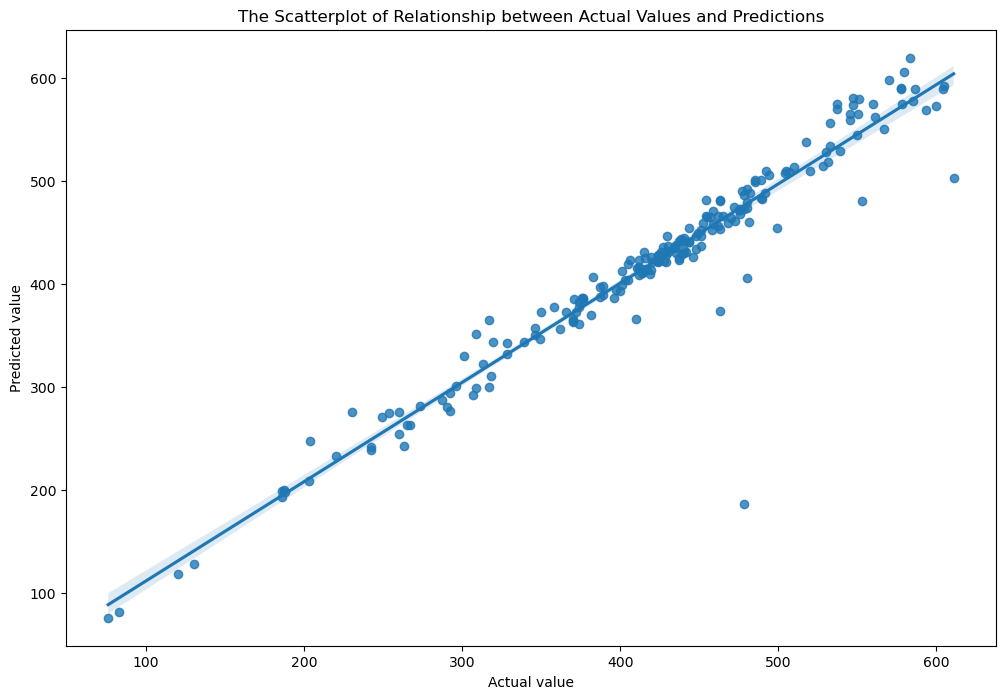

In [126]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
sns.regplot(data=mlr_diff,x=mlr_diff["Actual value"],y=mlr_diff["Predicted value"])
plt.savefig('results/Actual Vs Predicted with outliers.png', bbox_inches='tight')

In [127]:
print(np.mean(mlr_diff["error test"]))  
print(np.median(mlr_diff["error test"]))

-0.005713887117827618
-1.0242703369140713


- mean of error is nearly equal to zero

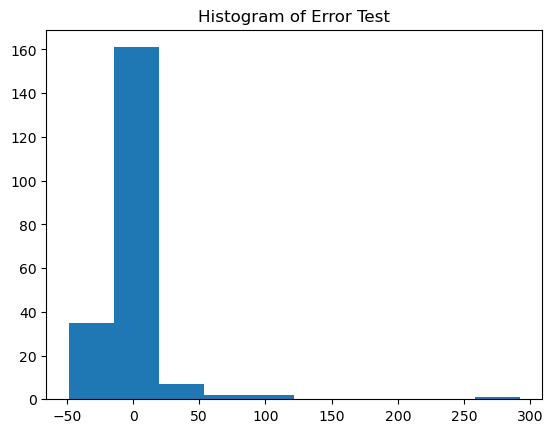

In [128]:
plt.title("Histogram of Error Test")
plt.hist(mlr_diff["error test"])
plt.savefig('results/Histogram of Error Test with outliers.png', bbox_inches='tight')

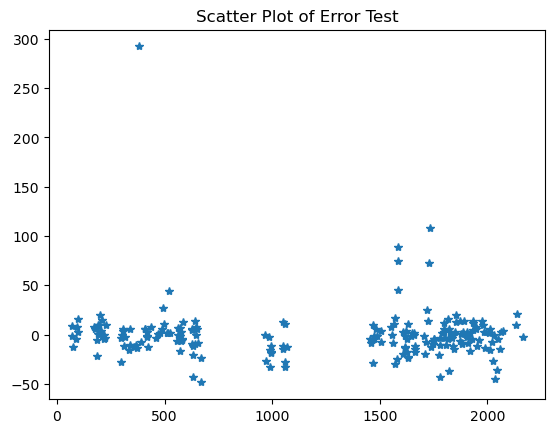

In [129]:
plt.title("Scatter Plot of Error Test")
plt.plot(mlr_diff["error test"],"*")
plt.savefig('results/Histogram of Error Test with outliers.png', bbox_inches='tight')

### 7.2. Without Outliers

In [130]:
def remove_outliers(df,  col, k  ):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]         
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
    print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])

In [131]:
remove_outliers(df,"UTS (M Pa)",3)

(1024, 19)
Number of outliers removed == > 13


In [132]:
# standardization 
X1=df1.iloc[:,0:-1]
y1=df1.iloc[:,-1]

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
df_train_x1,df_test_x1,df_train_y1,df_test_y1=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [135]:
xgboost2=XGBRegressor(random_state=42,learning_rate=0.30)
xgboost2.fit(df_train_x1,df_train_y1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [136]:
print_score(xgboost2, df_train_x1, df_train_y1, df_test_x1, df_test_y1, train=True,test=True)

Train Result:
mean absolute error: 1.4563
mean squared error: 11.3582
RMSE: 3.3702
r2_score: 0.9988


Test Result:
mean absolute error: 11.7703
mean squared error: 393.6506
RMSE: 19.8406
r2_score: 0.9514

r2_Score after Cross Validation

Training r2_score: 	 0.9498
Testing r2_score: 	 0.8413


In [137]:
#Actual value and the predicted value
mlr_diff2 = pd.DataFrame({'Actual value': df_test_y1, 'Predicted value': xgboost2.predict(df_test_x1)})
mlr_diff2["error test"]=mlr_diff2['Actual value']-mlr_diff2['Predicted value']
mlr_diff2.head(10)

,Actual value,Predicted value,error test
1566,456.989890,445.737427,11.252463
667,382.459350,386.241516,-3.782166
1069,467.777205,456.671936,11.105269
97,292.000000,272.275391,19.724609
1659,375.594695,371.441803,4.152892
1628,405.014645,404.574127,0.440518
1072,441.299250,422.075867,19.223383
1810,437.376590,447.703003,-10.326413
208,307.000000,286.101990,20.898010
1791,423.647280,425.668152,-2.020872


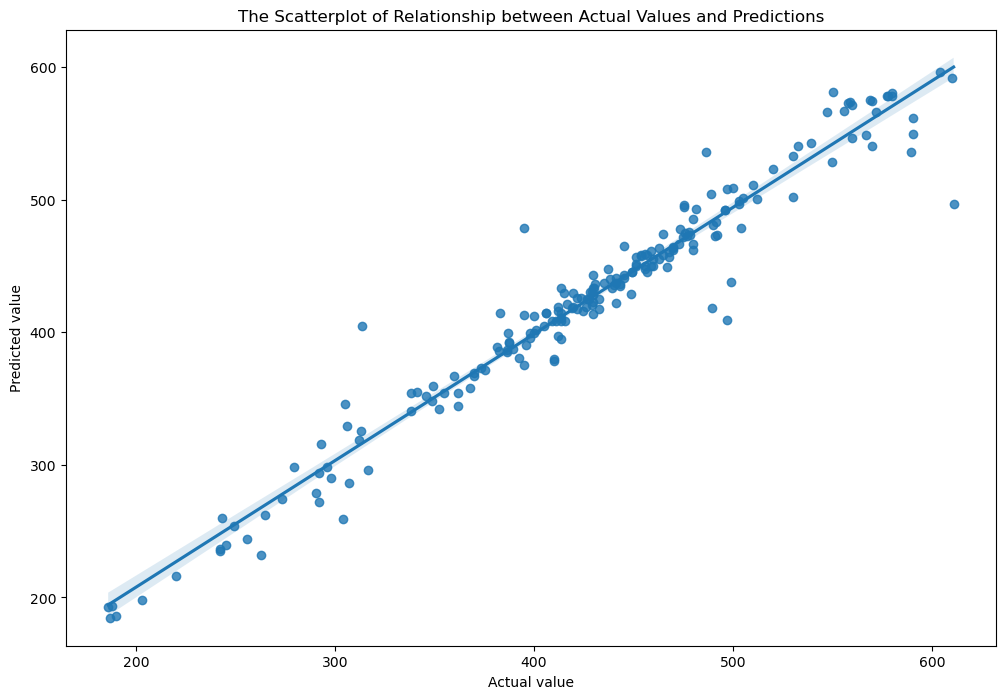

In [138]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
sns.regplot(data=mlr_diff2,x=mlr_diff2["Actual value"],y=mlr_diff2["Predicted value"])
plt.savefig('results/Actual Vs Predicted without outliers.png', bbox_inches='tight')

In [139]:
print(np.mean(mlr_diff2["error test"]))  
print(np.median(mlr_diff2["error test"]))

2.4570612116044197
1.8334044140624997


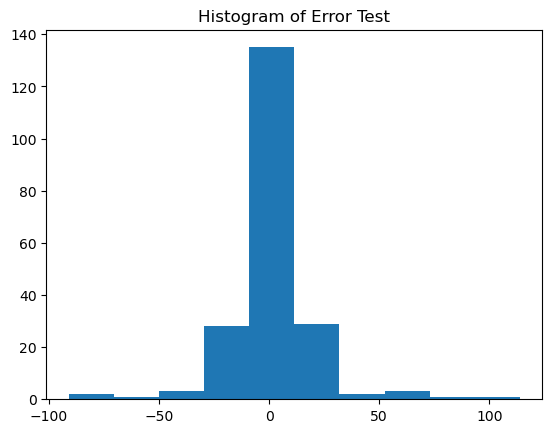

In [140]:
plt.title("Histogram of Error Test")
plt.hist(mlr_diff2["error test"])
plt.savefig('results/Histogram of Error Test without outliers.png', bbox_inches='tight')

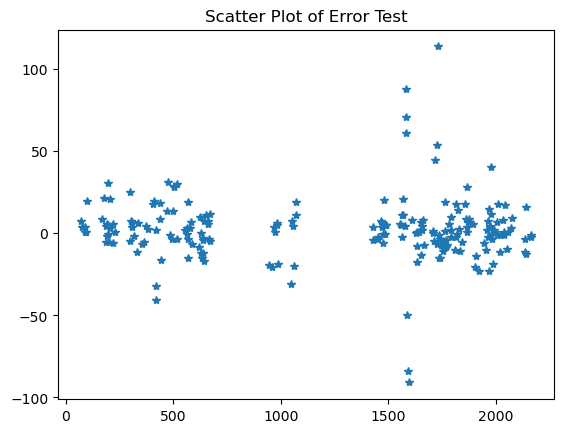

In [141]:
plt.title("Scatter Plot of Error Test")
plt.plot(mlr_diff2["error test"],"*")
plt.savefig('results/Histogram of Error Test without outliers.png', bbox_inches='tight')

In [142]:
df_test_x1.head(1)

,Mo,Mn,Si,Nb,Ti,V,Cu,N,C,B,P,S,Co,Al,Solution_treatment_temperature,Solution_treatment_time(s),Water_Quenched_after_s.t.,Temperature (K)
1566,0.0,0.81,0.63,0.0,0.5,0.0,0.0,0.0,0.06,0.0,0.028,0.007,0.0,0.0,1403.0,3600.0,0.0,673.0


In [143]:
df_test_y1.head(1)

1566    456.98989
Name: UTS (M Pa), dtype: float64

## 8. Predictions for new Data

In [144]:
# generating predictions for new Data
l=[(0.0,1.66,0.55,0.0,0.25,0.0,0.0,0.0,0.05,0.0,0.022,0.013,0.0,0.0,1323.0,1500.0,0,823)]
i=np.array(l)
y_pred = xgboost2.predict(i)
# creating table with test & predicted for test
print('predictions for new Data :',y_pred)

predictions for new Data : [402.2068]


## 9. Pickling the Model file for Deployement

In [145]:
import pickle

In [146]:
pickle.dump(xgboost,open("model.pkl","wb"))